In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = Path("Resources/ca_resid_pop_new.csv")
df = pd.read_csv(csv_path)
df.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,1-Apr-10,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,NaN
3,.California,"37,253,956","37,254,519","37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223","39,501,653","39,142,991","39,029,342",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Delete the first three rows

ddf = df.drop(df.columns[0:8], axis=1)
#ddf = df.dropna()


# columns_to_check = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
# ddf = df.dropna(subset=columns_to_check)
# Reset the row index
#ddf.reset_index(drop=True, inplace=True)

#df = df.dropna(how='any')
# CalResidents_df = df.iloc[3:]
# CalResidents_df = df.iloc[:-1]
# df.reset_index(drop=True, inplace=True)
ddf.head()

,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,2016,2017,2018,2019,2020,2021,2022,NaN
3,"38,918,045","39,167,117","39,358,497","39,461,588","39,512,223","39,501,653","39,142,991","39,029,342",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

del ddf['Unnamed: 16']


# # Display the modified table
ddf.head()

,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,2016,2017,2018,2019,2020,2021,2022
3,"38,918,045","39,167,117","39,358,497","39,461,588","39,512,223","39,501,653","39,142,991","39,029,342"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Delete the first three rows
dddf = ddf.iloc[2:]

# Reset the row index
dddf.reset_index(drop=True, inplace=True)
# Delete the last row
dddf = dddf.iloc[:-1]

# dddf = ddf.iloc[:3]
dddf.head()

,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2015,2016,2017,2018,2019,2020,2021,2022
1,"38,918,045","39,167,117","39,358,497","39,461,588","39,512,223","39,501,653","39,142,991","39,029,342"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop all rows with NaN cells
cleandf = dddf.dropna(axis=0, how='any')

cleandf.head()

,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2015,2016,2017,2018,2019,2020,2021,2022
1,"38,918,045","39,167,117","39,358,497","39,461,588","39,512,223","39,501,653","39,142,991","39,029,342"


In [7]:
#rename heading as first row
cleandf.columns = cleandf.iloc[0]

# Drop the first row from the DataFrame
cleandf = cleandf[1:]

# Reset the index of the DataFrame
cleandf = cleandf.reset_index(drop=True)

cleandf



,2015,2016,2017,2018,2019,2020,2021,2022
0,"38,918,045","39,167,117","39,358,497","39,461,588","39,512,223","39,501,653","39,142,991","39,029,342"


In [8]:
# Create a DataFrame from the provided dataset
data = {"Year":[2015, 2016,2017, 2018, 2019, 2020, 2021, 2022 ], 
        "Population": [38918045, 39167117, 39358497, 39461588, 39512223, 39501653, 39142991, 39029342]}

newdf = pd.DataFrame(data)
newdf


,Year,Population
0,2015,38918045
1,2016,39167117
2,2017,39358497
3,2018,39461588
4,2019,39512223
5,2020,39501653
6,2021,39142991
7,2022,39029342


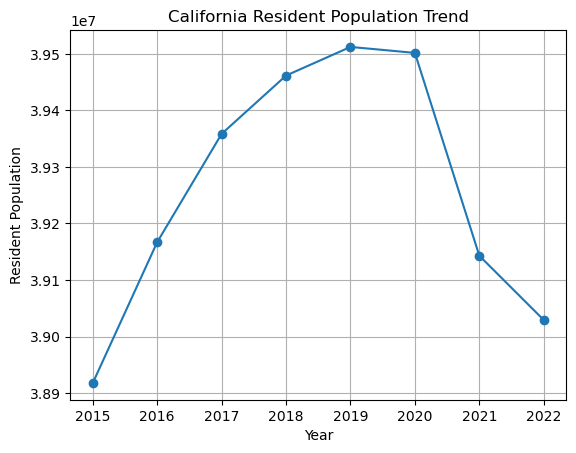

In [9]:
# # Plotting the line plot
plt.plot(newdf['Year'], newdf['Population'], marker='o')
plt.xlabel('Year')
plt.ylabel('Resident Population')
plt.title('California Resident Population Trend')
plt.grid(True)
plt.show()

In [15]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(Year, Resident_Population)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate regression line
regression_line = slope * Year + intercept

# Plotting the line chart with regression line
plt.figure(figsize=(12, 6))
plt.plot(Year, Resident_Population, marker='o', linestyle='-', label='Resident_Population')
plt.plot(Year, regression_line, linestyle='--', label='Regression Line')
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.annotate(line_eq,(2020,38918045),fontsize=15,color="red")


plt.xlabel('Year')
plt.ylabel('Resident Population')
plt.title('California Resident Population Trend')
plt.grid(True)
plt.show()

print("Regression Line Equation: y = {:.2f}x + {:.2f}".format(slope, intercept))
print("Correlation Coefficient:", r_value)

NameError: name 'Year' is not defined